In [1]:

# indir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# outdir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_indir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0/"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/single/"
cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/cells_meta.tsv"

#cloneID = "0_C6"
#DONOR = 0



In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [4]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [5]:
#donor_vars = AF_df>0.9

In [6]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,donor,cloneID,condition,clusterID
GCGCCAAGTTGCCTGG-1_Input,0,0_C8,Input,MPP/CMP/GMP
GGTCATACAAGGCGTA-1_Flt3l,0,0_C7,Flt3l,neutrophil B
CAGTGCGAGGTTCTCA-1_Control,0,0_C0,Control,eosonophil
ACTTTCAGTACTATGC-1_Input,0,0_C8,Input,MPP/CMP/GMP
TTGACGATCCTCCATG-1_Input,0,0_C8,Input,neutrophil B
...,...,...,...,...
GGATAGGAGCTCGTTA-1_Control,0,0_C1,Control,neutrophil
ACATGCAAGAAATACC-1_Input,0,0_C0,Input,MPP/CMP/GMP B
TCCAGAAGTAGGGTCA-1_Input,0,0_C5,Input,MPP/CMP/GMP B
CTGTTCGGTGGTTCTA-1_Flt3l,0,0_C0,Flt3l,meg/erythroid


## Get donor-specific variants

number of donor vars: 28


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


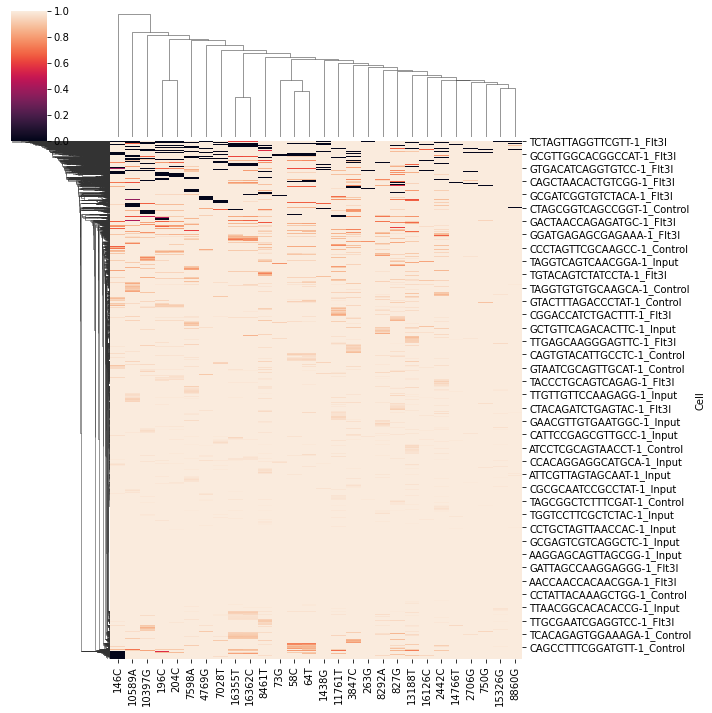

In [7]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.9, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")

sns.clustermap(AF_df.loc[:, donor_vars])
plt.savefig(join(outdir, "donor_vars.png"))

## Filter for clone

In [8]:
AF_df.head()

,10397G,10463C,10559G,10589A,11251G,11453A,11719A,11761T,11812G,13188T,...,750G,7598A,827G,8292A,8461T,8697A,8743A,8860G,930A,9899C
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAATCAAC-1_Control,1.0,0.0,0.0,0.882353,0.153846,0.0,0.000000,0.846154,0.054054,1.000000,...,1.0,1.000000,0.961538,0.866667,1.000000,0.0,0.0,1.0,0.0,0.000000
AAACGAAAGCGAGAAA-1_Control,1.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,0.838710,0.0,0.0,1.0,0.0,0.076923
AAACGAAAGTACAGAT-1_Control,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.000000
AAACGAAAGTTAGCAA-1_Control,0.8,0.0,0.0,1.000000,0.000000,0.0,0.428571,0.700000,0.000000,0.818182,...,1.0,1.000000,1.000000,0.909091,1.000000,0.5,0.0,1.0,0.0,0.250000
AAACGAACACTCGCAG-1_Control,1.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,...,1.0,0.928571,1.000000,1.000000,0.888889,0.0,0.0,1.0,0.0,0.000000


In [9]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [10]:
AF_df.head()

Cell,AAACGAAAGAATCAAC-1_Control,AAACGAAAGCGAGAAA-1_Control,AAACGAAAGTACAGAT-1_Control,AAACGAAAGTTAGCAA-1_Control,AAACGAACACTCGCAG-1_Control,AAACGAATCAGGCGCT-1_Control,AAACGAATCCATCGAA-1_Control,AAACGAATCTCGTAGA-1_Control,AAACTCGAGTGAAGGA-1_Control,AAACTCGCATGCACTA-1_Control,...,TTTGGTTTCTGATCCC-1_Input,TTTGTGTAGTTCGTTG-1_Input,TTTGTGTCACACATTG-1_Input,TTTGTGTGTAAGCCGA-1_Input,TTTGTGTGTAGATTAG-1_Input,TTTGTGTGTAGGGTCA-1_Input,TTTGTGTGTTTCTTAC-1_Input,TTTGTGTTCCTGAAAC-1_Input,TTTGTGTTCGGGAAAC-1_Input,TTTGTGTTCTGGCACG-1_Input
10397G,1.000000,1.0,0.0,0.8,1.0,1.0,1.0,1.0,1.000000,1.0,...,0.979798,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.978495,1.0,1.000000
10463C,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10559G,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.062500,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10589A,0.882353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.000000,0.984848,1.0,0.970588,0.736842,0.966102,1.0,1.000000,1.0,1.000000
11251G,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.000000,0.036145,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.023256


0_C0


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(142120, 4)
0_C1


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(14756, 4)
0_C2


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(17340, 4)
0_C3


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(15980, 4)
0_C4


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(19176, 4)
0_C5


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(176256, 4)
0_C6


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(11356, 4)
0_C7


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(19584, 4)
0_C8


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(161772, 4)
0_C9


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


(10540, 4)


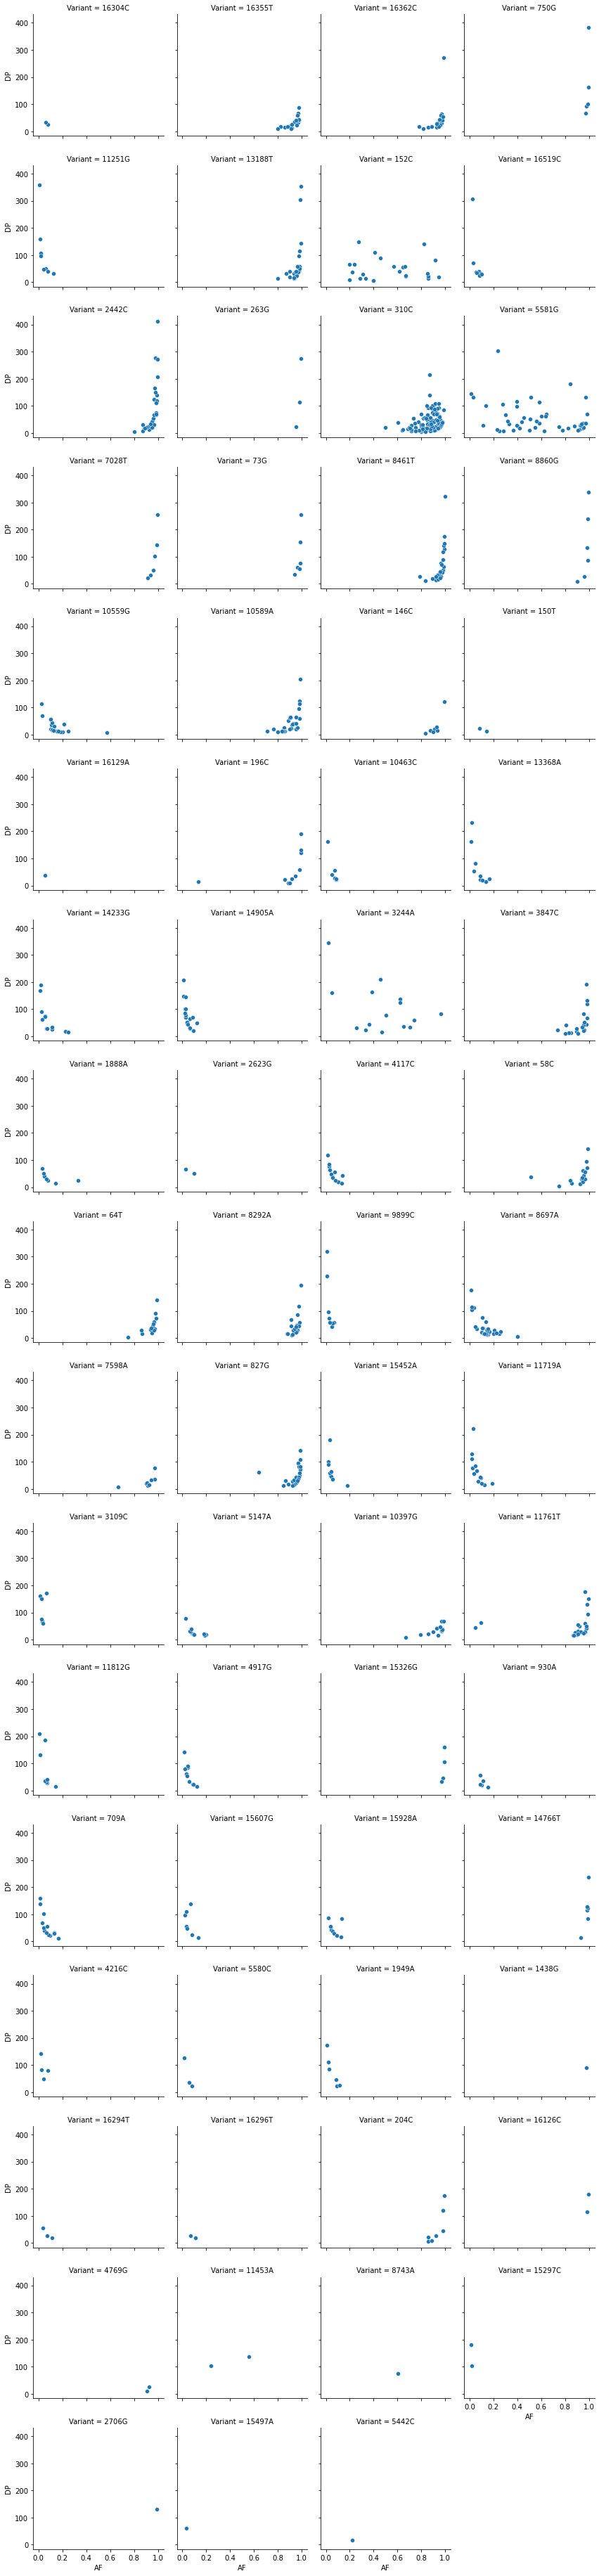

In [24]:
for cloneID, curr_cells in cells_meta.groupby("cloneID"):
    print(cloneID)
    curr_outdir = join(outdir, f"cloneID_{cloneID}")
    if not exists(curr_outdir):
        os.mkdir(curr_outdir)
    #curr_cells = cells_meta.loc[cells_meta["cloneID"] == cloneID]

    curr_AF_df = AF_df.loc[:,curr_cells.index]
    curr_DP_df = DP_df.loc[:,curr_cells.index]

    curr_AD_df = (np.round(curr_AF_df*curr_DP_df)).astype(int)

    g = sns.clustermap(curr_AF_df)
    plt.savefig(join(curr_outdir,"af.png"))
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]
    sns.clustermap(np.log2(1+curr_DP_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)
    plt.savefig(join(curr_outdir,"dp.png"))
    sns.clustermap(np.log2(1+curr_AD_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)
    plt.savefig(join(curr_outdir,"ad.png"))

    g = sns.clustermap(np.log2(1+curr_AD_df))
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]
    sns.clustermap(np.log2(1+curr_DP_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)

    ## Correlate AF with Coverage for each variant

    #curr_AF_long = curr_AF_df.reset_index().melt(var_name="cell", id_vars=["Variant"], value_name="AF")
    curr_AF_long = curr_AF_df.reset_index().melt(id_vars=["index"], value_name="AF", var_name="Cell").rename({"index":"Variant"}, axis=1)
    curr_DP_long = curr_DP_df.reset_index().melt(id_vars=["index"], value_name="DP", var_name="Cell").rename({"index":"Variant"}, axis=1)#curr_DP_df.reset_index().melt(var_name="cell", id_vars=["Variant"], value_name="DP")

    df_long = pd.merge(curr_AF_long, curr_DP_long, on=["Cell", "Variant"])
    print(df_long.shape)
    df_long.head()

    %matplotlib inline
    g = sns.FacetGrid(col="Variant", col_wrap=4, data=df_long)
    g.map_dataframe(sns.scatterplot, x="AF", y="DP")
    plt.savefig(join(curr_outdir,"scatter_AF_DP.png"))

    %matplotlib inline
    # Remove the 0's and 1's
    g = sns.FacetGrid(col="Variant", col_wrap=4, data=df_long.loc[~((df_long["AF"] == 0) | (df_long["AF"] == 1))])
    g.map_dataframe(sns.scatterplot, x="AF", y="DP")

    plt.savefig(join(curr_outdir,"scatter_AF_DP_no_0_1.png"))
    plt.close('all')

## Remove donor-specific variants

In [13]:
for cloneID, curr_cells in cells_meta.groupby("cloneID"):
    print(cloneID)
    curr_outdir = join(outdir, f"cloneID_{cloneID}")
#     if not exists(curr_outdir):
#         os.mkdir(curr_outdir)
    #curr_cells = cells_meta.loc[cells_meta["cloneID"] == cloneID]

    curr_AF_df = AF_df.loc[:,curr_cells.index]
    curr_DP_df = DP_df.loc[:,curr_cells.index]

    # Remove Donor variannts
    curr_AF_df = curr_AF_df.loc[~(curr_AF_df.index.isin(donor_vars))]
    curr_DP_df = curr_DP_df.loc[curr_AF_df.index, curr_AF_df.columns] 
    
    curr_AD_df = (np.round(curr_AF_df*curr_DP_df)).astype(int)

    g = sns.clustermap(curr_AF_df, vmax=0.4)
    plt.savefig(join(curr_outdir,"noDonVars_af_vmax_0.4.png"))
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]
    sns.clustermap(np.log2(1+curr_DP_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)
    plt.savefig(join(curr_outdir,"noDonVars_dp.png"))
    sns.clustermap(np.log2(1+curr_AD_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)
    plt.savefig(join(curr_outdir,"noDonVars_ad.png"))
    plt.close('all')
#     g = sns.clustermap(np.log2(1+curr_AD_df))
#     inds = g.dendrogram_row.dendrogram["leaves"]
#     cols = g.dendrogram_col.dendrogram["leaves"]
#     sns.clustermap(np.log2(1+curr_DP_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)

    ## Correlate AF with Coverage for each variant
#     curr_AF_long = curr_AF_df.reset_index().melt(id_vars=["index"], value_name="AF", var_name="Cell").rename({"index":"Variant"}, axis=1)
#     curr_DP_long = curr_DP_df.reset_index().melt(id_vars=["index"], value_name="DP", var_name="Cell").rename({"index":"Variant"}, axis=1)#curr_DP_df.reset_index().melt(var_name="cell", id_vars=["Variant"], value_name="DP")

#     df_long = pd.merge(curr_AF_long, curr_DP_long, on=["Cell", "Variant"])
#     print(df_long.shape)
#     df_long.head()


0_C0
0_C1
0_C2
0_C3
0_C4
0_C5
0_C6
0_C7
0_C8
0_C9


In [14]:
curr_outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/single/cloneID_0_C9'